In [30]:
# Import modules
import flowsom as fs
import pytometry as pm
import scanpy as sc
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import fcsparser

# set default plotting parameters
plt.rcParams["figure.figsize"] = (6.5, 4.8)
plt.rcParams["figure.dpi"] = 300
plt.rcParams["font.size"] = 10

In [4]:
barcodes = pd.read_csv("/Volumes/USB DISK/Others/Radiohead/Teiko/data/Users/shane/Documents/GitHub/PICI002/fcs/v01/PICI002_v01_concatenated_fcs/barcodes.csv")

biorepository_2025_merged = pd.read_csv("/Users/cponti/Desktop/BioRepository/biorepository 2025/biorepo_2025_df_clean_REDCap_records_merged.csv")

df_clean = pd.read_csv("/Users/cponti/Desktop/BioRepository/REDCap/df_clean_ready_for_web_app.csv")

In [5]:
# Survides and not survided
survivors_ids = pd.unique(df_clean[df_clean['subject_dead'] == 0]['subject_id'])
non_survivors_ids = pd.unique(df_clean[df_clean['subject_dead'] == 1]['subject_id'])

samples_survivors = biorepository_2025_merged[biorepository_2025_merged['Participant ID'].isin(survivors_ids)]
samples_non_survivors = biorepository_2025_merged[biorepository_2025_merged['Participant ID'].isin(non_survivors_ids)]

In [6]:
fcs_barcodes = pd.unique(barcodes['Client Sample ID'])

## workflow

In [4]:
# Subset pre_treat and on_treat barcodes from biorepository_2025_merged
biorepository_2025_merged_pre_treat = biorepository_2025_merged[biorepository_2025_merged['Barcode Timepoint'] == 'Pre-Treatment']
biorepository_2025_merged_on_treat = biorepository_2025_merged[biorepository_2025_merged['Barcode Timepoint'] == 'On Treatment']
biorepository_2025_merged_follow_up = biorepository_2025_merged[biorepository_2025_merged['Barcode Timepoint'] == 'Follow Up']
biorepository_2025_merged_follow_up1 = biorepository_2025_merged[biorepository_2025_merged['Barcode Timepoint'] == 'Follow-Up1']
biorepository_2025_merged_follow_up2 = biorepository_2025_merged[biorepository_2025_merged['Barcode Timepoint'] == 'Follow-Up2']
biorepository_2025_merged_irae = biorepository_2025_merged[biorepository_2025_merged['Barcode Timepoint'] == 'Irae']
biorepository_2025_merged_irae_4w = biorepository_2025_merged[biorepository_2025_merged['Barcode Timepoint'] == 'Irae 4 Week Follow-Up']
biorepository_2025_merged_irae_6m = biorepository_2025_merged[biorepository_2025_merged['Barcode Timepoint'] == 'Irae 6 Month Follow-Up']
biorepository_2025_merged_irae_12m = biorepository_2025_merged[biorepository_2025_merged['Barcode Timepoint'] == 'Irae 12 Month Follow-Up']
biorepository_2025_merged_eosi = biorepository_2025_merged[biorepository_2025_merged['Barcode Timepoint'] == 'Eosi']
biorepository_2025_merged_end_of_study = biorepository_2025_merged[biorepository_2025_merged['Barcode Timepoint'] == 'End Of Study']

biorepository_2025_merged_pre_treat_barcodes = pd.unique(biorepository_2025_merged_pre_treat['Barcode'])
biorepository_2025_merged_on_treat_barcodes = pd.unique(biorepository_2025_merged_on_treat['Barcode'])
biorepository_2025_merged_follow_up_barcodes = pd.unique(biorepository_2025_merged_follow_up['Barcode'])
biorepository_2025_merged_follow_up1_barcodes = pd.unique(biorepository_2025_merged_follow_up1['Barcode'])
biorepository_2025_merged_follow_up2_barcodes = pd.unique(biorepository_2025_merged_follow_up2['Barcode'])
biorepository_2025_merged_irae_barcodes = pd.unique(biorepository_2025_merged_irae['Barcode'])
biorepository_2025_merged_irae_4w_barcodes = pd.unique(biorepository_2025_merged_irae_4w['Barcode'])
biorepository_2025_merged_irae_6m_barcodes = pd.unique(biorepository_2025_merged_irae_6m['Barcode'])
biorepository_2025_merged_irae_12m_barcodes = pd.unique(biorepository_2025_merged_irae_12m['Barcode'])
biorepository_2025_merged_eosi_barcodes = pd.unique(biorepository_2025_merged_eosi['Barcode'])
biorepository_2025_merged_end_of_study_barcodes = pd.unique(biorepository_2025_merged_end_of_study['Barcode'])

In [6]:
# Find matches 
pre_treat_fcs = set(fcs_barcodes) & set(biorepository_2025_merged_pre_treat_barcodes)
on_treat_fcs = set(fcs_barcodes) & set(biorepository_2025_merged_on_treat_barcodes)
follow_up_fcs = set(fcs_barcodes) & set(biorepository_2025_merged_follow_up_barcodes)
follow_up1_fcs = set(fcs_barcodes) & set(biorepository_2025_merged_follow_up1_barcodes)
follow_up2_fcs = set(fcs_barcodes) & set(biorepository_2025_merged_follow_up2_barcodes)
irae_fcs = set(fcs_barcodes) & set(biorepository_2025_merged_irae_barcodes)
irae_4w_fcs = set(fcs_barcodes) & set(biorepository_2025_merged_irae_4w_barcodes)
irae_6m_fcs = set(fcs_barcodes) & set(biorepository_2025_merged_irae_6m_barcodes)
irae_12m_fcs = set(fcs_barcodes) & set(biorepository_2025_merged_irae_12m_barcodes)
eosi_fcs = set(fcs_barcodes) & set(biorepository_2025_merged_eosi_barcodes)
end_of_study_fcs = set(fcs_barcodes) & set(biorepository_2025_merged_end_of_study_barcodes)


In [8]:
dict_pre_treat = {}

for barcode in pre_treat_fcs:
    row = barcodes[barcodes['Client Sample ID'] == barcode]
    if not row.empty:
        dict_pre_treat[barcode] = [
            row['PID'].values[0],
            row['Barcode #'].values[0]
        ]

valid_pid_pop_pairs = set(tuple(v) for v in dict_pre_treat.values())


matched_filenames_pre_treat = [
    filename for filename, (pid, pop) in filename_dict.items()
    if (pid, pop) in valid_pid_pop_pairs
]

matched_filenames_pre_treat_dict = {}
for filename, (pid, pop) in filename_dict.items():
    for barcode, (b_pid, b_pop) in dict_pre_treat.items():
        if (pid, pop) == (b_pid, b_pop):
            matched_filenames_pre_treat_dict[barcode] = filename
            break


In [9]:
# Find corresponding fcs files for on_treat 
dict_on_treat = {}

for barcode in on_treat_fcs:
    row = barcodes[barcodes['Client Sample ID'] == barcode]
    if not row.empty:
        dict_on_treat[barcode] = [
            row['PID'].values[0],
            row['Barcode #'].values[0]
        ]

valid_pid_pop_pairs = set(tuple(v) for v in dict_on_treat.values())


matched_filenames_on_treat = [
    filename for filename, (pid, pop) in filename_dict.items()
    if (pid, pop) in valid_pid_pop_pairs
]

matched_filenames_on_treat_dict = {}
for filename, (pid, pop) in filename_dict.items():
    for barcode, (b_pid, b_pop) in dict_on_treat.items():
        if (pid, pop) == (b_pid, b_pop):
            matched_filenames_on_treat_dict[barcode] = filename
            break



## timepoints

In [8]:
# Make this workflow a function 
def segment_filenames_by_timepoint(
    merged_df,
    barcodes_df,
    fcs_barcodes,
    filename_dict,
    fcs_folder
):
    # timepoints
    timepoints = [
        'Pre-Treatment', 'On Treatment', 'Follow Up', 'Follow-Up1', 'Follow-Up2',
        'Irae', 'Irae 4 Week Follow-Up', 'Irae 6 Month Follow-Up', 'Irae 12 Month Follow-Up',
        'Eosi', 'End Of Study'
    ]

    # timpoint dictionary
    timepoint_files = {}

    for tp in timepoints:
        # Subset by timepoint
        tp_df = merged_df[merged_df['Barcode Timepoint'] == tp]
        tp_barcodes = pd.unique(tp_df['Barcode'])

        # Find intersecting barcodes
        tp_fcs = set(fcs_barcodes) & set(tp_barcodes)

        # Map barcodes to PID and Barcode #
        tp_dict = {}
        for barcode in tp_fcs:
            row = barcodes_df[barcodes_df['Client Sample ID'] == barcode]
            if not row.empty:
                tp_dict[barcode] = [
                    row['PID'].values[0],
                    row['Barcode #'].values[0]
                ]

        # Create set of valid (PID, Barcode #) pairs
        valid_pid_pop_pairs = set(tuple(v) for v in tp_dict.values())

        # Match filenames to valid pairs
        matched_filenames_dict = {}
        for filename, (pid, pop) in filename_dict.items():
            for barcode, (b_pid, b_pop) in tp_dict.items():
                if (pid, pop) == (b_pid, b_pop):
                    matched_filenames_dict[barcode] = filename
                    break

        # Full path list for matched filenames
        full_paths = [fcs_folder + filename[2:] for filename in matched_filenames_dict.values()]
        timepoint_files[tp] = full_paths

    return timepoint_files



In [10]:
import os
fcs_folder = "/Volumes/USB DISK/Others/Radiohead/Teiko/data/Users/shane/Documents/GitHub/PICI002/fcs/v01/PICI002_v01_concatenated_fcs/fcs_files/"
filenames = os.listdir(fcs_folder)

filename_dict = {}

for filename in filenames:
    parts = filename.split('_')
    
    if len(parts) >= 5:
        # Extract population and PID based on known positions
        for part in parts:
            if len(part) == 3:
                pid = part
            if part.startswith('Pop'):
                pop = part.split('.')[0].lower()

            
        if pid and pop:
            filename_dict[filename] = [pid, pop]
        else:
            print(f"Missing PID or pop in filename: {filename}")
    else:
        print(f"Filename format unexpected: {filename}")
            



In [11]:
timepoint_filenames = segment_filenames_by_timepoint(
    merged_df=biorepository_2025_merged,
    barcodes_df=barcodes,
    fcs_barcodes=fcs_barcodes,
    filename_dict=filename_dict,
    fcs_folder=fcs_folder
)

pre_treat_files = timepoint_filenames['Pre-Treatment']
on_treat_files = timepoint_filenames['On Treatment']
follow_up_files = timepoint_filenames['Follow Up']
follow_up1_files = timepoint_filenames['Follow-Up1']
follow_up2_files = timepoint_filenames['Follow-Up2']
irae_files = timepoint_filenames['Irae']
irae_4w_files = timepoint_filenames['Irae 4 Week Follow-Up']
irae_6m_files = timepoint_filenames['Irae 6 Month Follow-Up']
irae_12m_files = timepoint_filenames['Irae 12 Month Follow-Up']
eosi_files = timepoint_filenames['Eosi']
end_of_study_files = timepoint_filenames['End Of Study']

In [12]:
pre_data = [fcsparser.parse(f, reformat_meta=True)[1] for f in pre_treat_files]
on_data = [fcsparser.parse(f, reformat_meta=True)[1] for f in on_treat_files]


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/var/folders/d9/gs24bvf10dq_lnn5k5nqrblm0000gp/T/ipykernel_8208/164835995.py:13: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_combined = adata_pre.concatenate(adata_on, batch_key='sample')


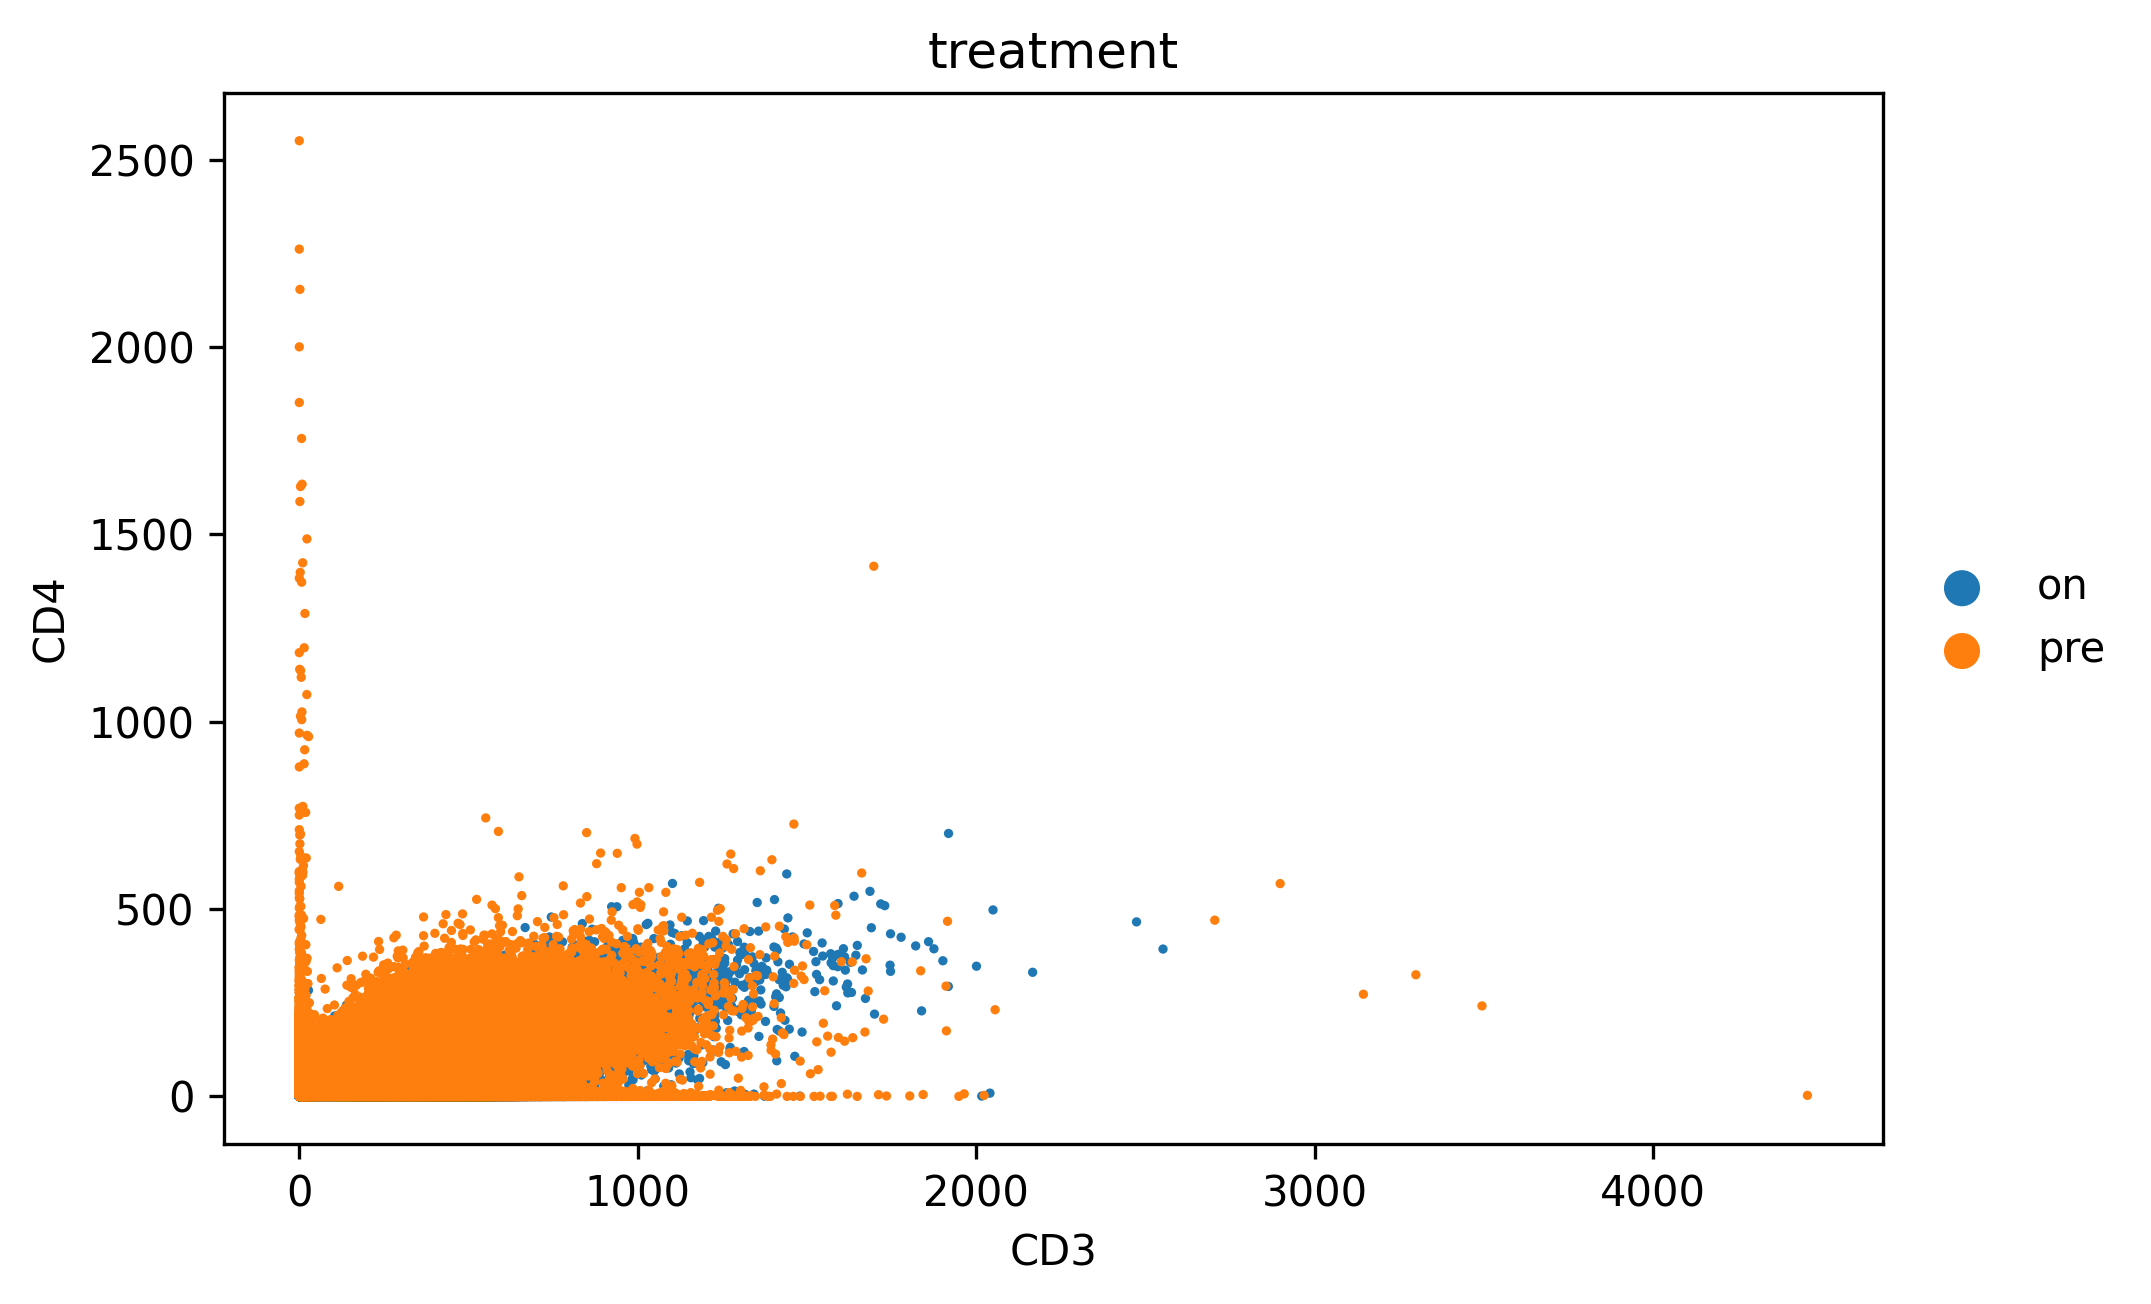

In [14]:
import scanpy as sc
import anndata

# Example: just using the first pre-treatment sample
adata_pre = anndata.AnnData(pre_data[0])
adata_on = anndata.AnnData(on_data[0])

# Add metadata
adata_pre.obs['treatment'] = 'pre'
adata_on.obs['treatment'] = 'on'

# Combine into one AnnData object
adata_combined = adata_pre.concatenate(adata_on, batch_key='sample')

# Now you can use scanpy
sc.pl.scatter(adata_combined, x='CD3', y='CD4', color='treatment', size=20)


In [15]:
# Combine all pre-treatment and on-treatment data
pre_combined = pd.concat(pre_data, ignore_index=True)
on_combined = pd.concat(on_data, ignore_index=True)

# Randomly sample 50 cells from each group
pre_sample = pre_combined.sample(n=50, random_state=42)
on_sample = on_combined.sample(n=50, random_state=42)

# Add label 
pre_sample['Treatment'] = 'Pre'
on_sample['Treatment'] = 'On'

In [16]:
sampled_df = pd.concat([pre_sample, on_sample], ignore_index=True)
print(sampled_df['Treatment'].value_counts())

Treatment
Pre    50
On     50
Name: count, dtype: int64


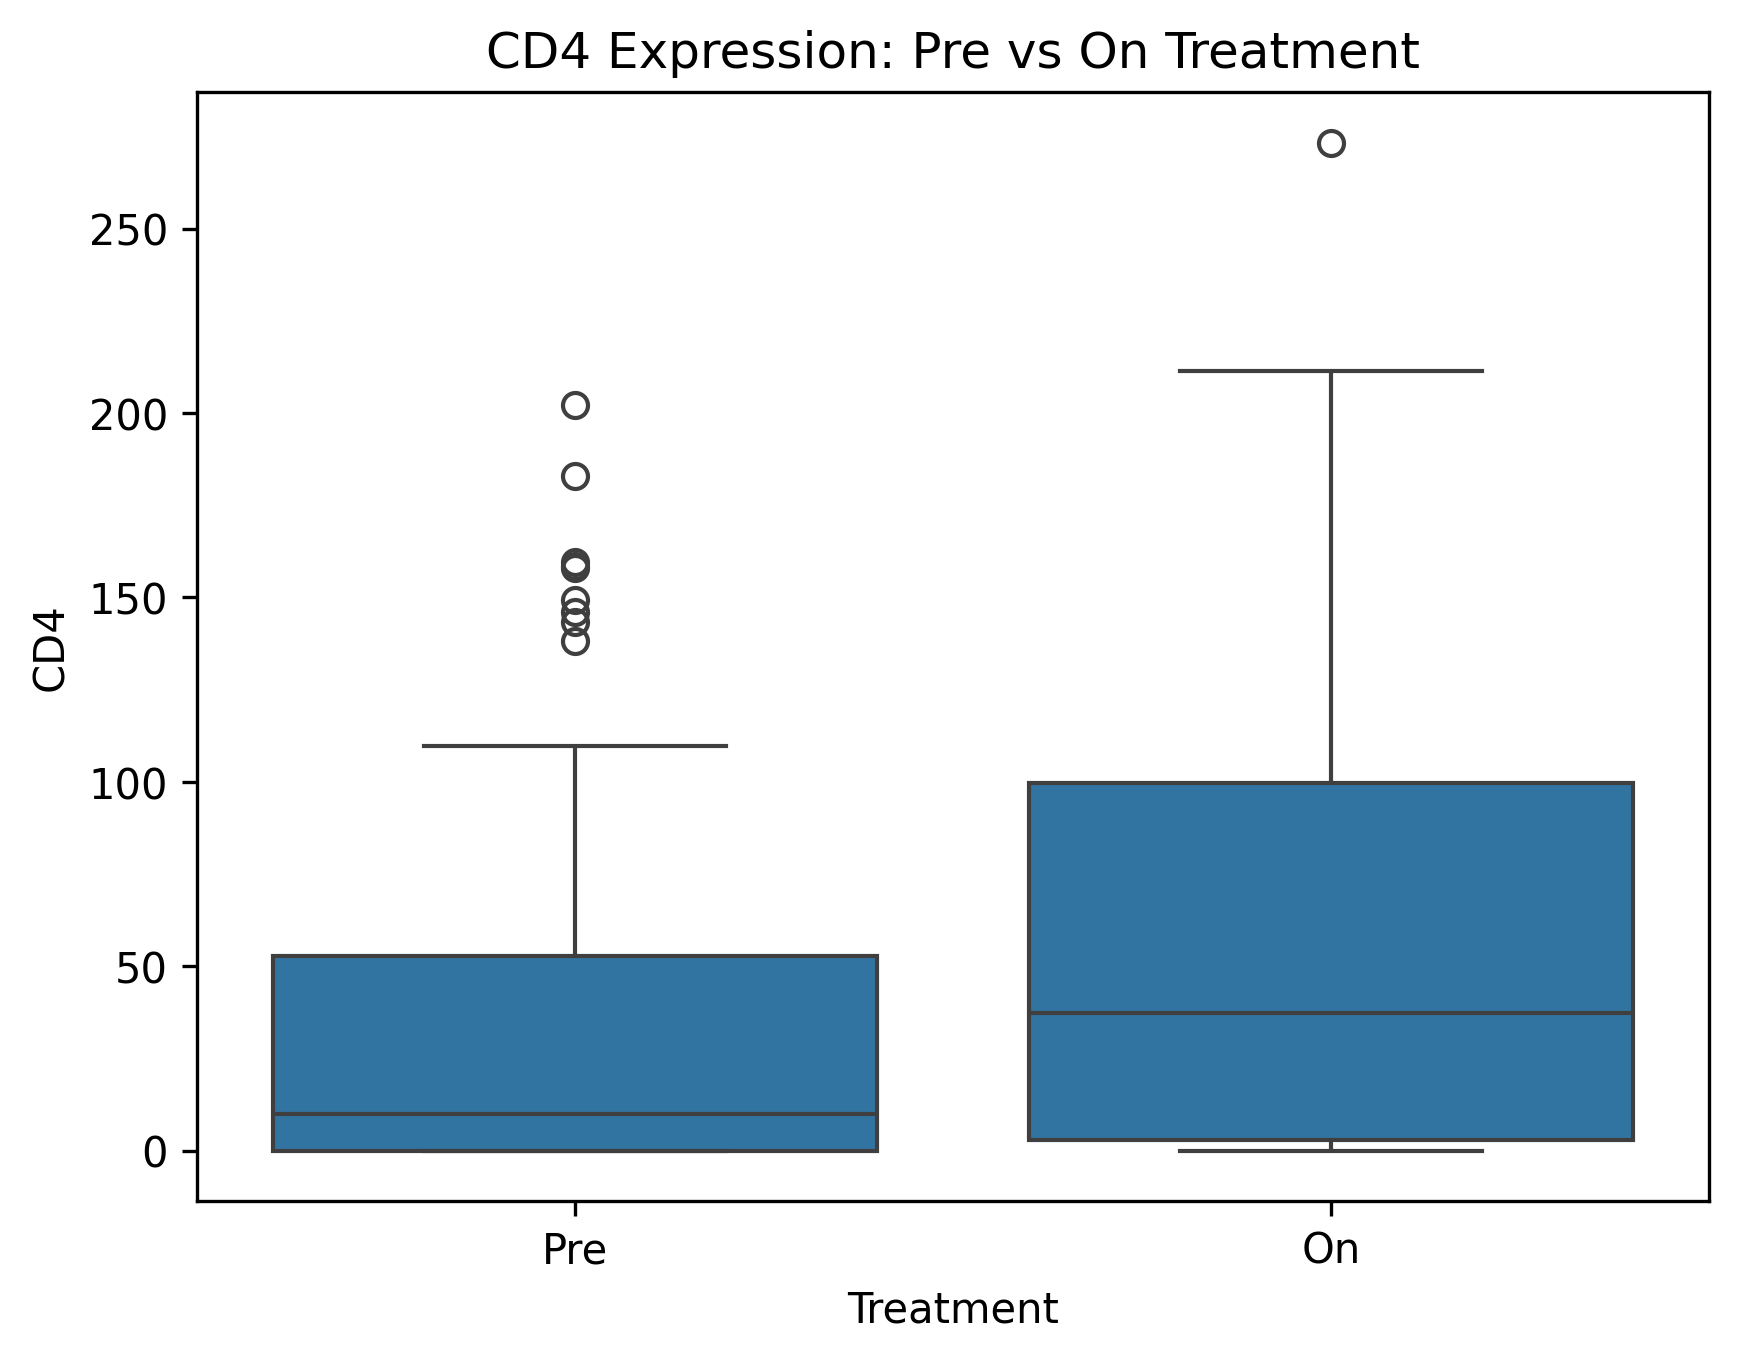

In [17]:
import seaborn as sns
sns.boxplot(data=sampled_df, x='Treatment', y='CD4')
plt.title('CD4 Expression: Pre vs On Treatment')
plt.show()

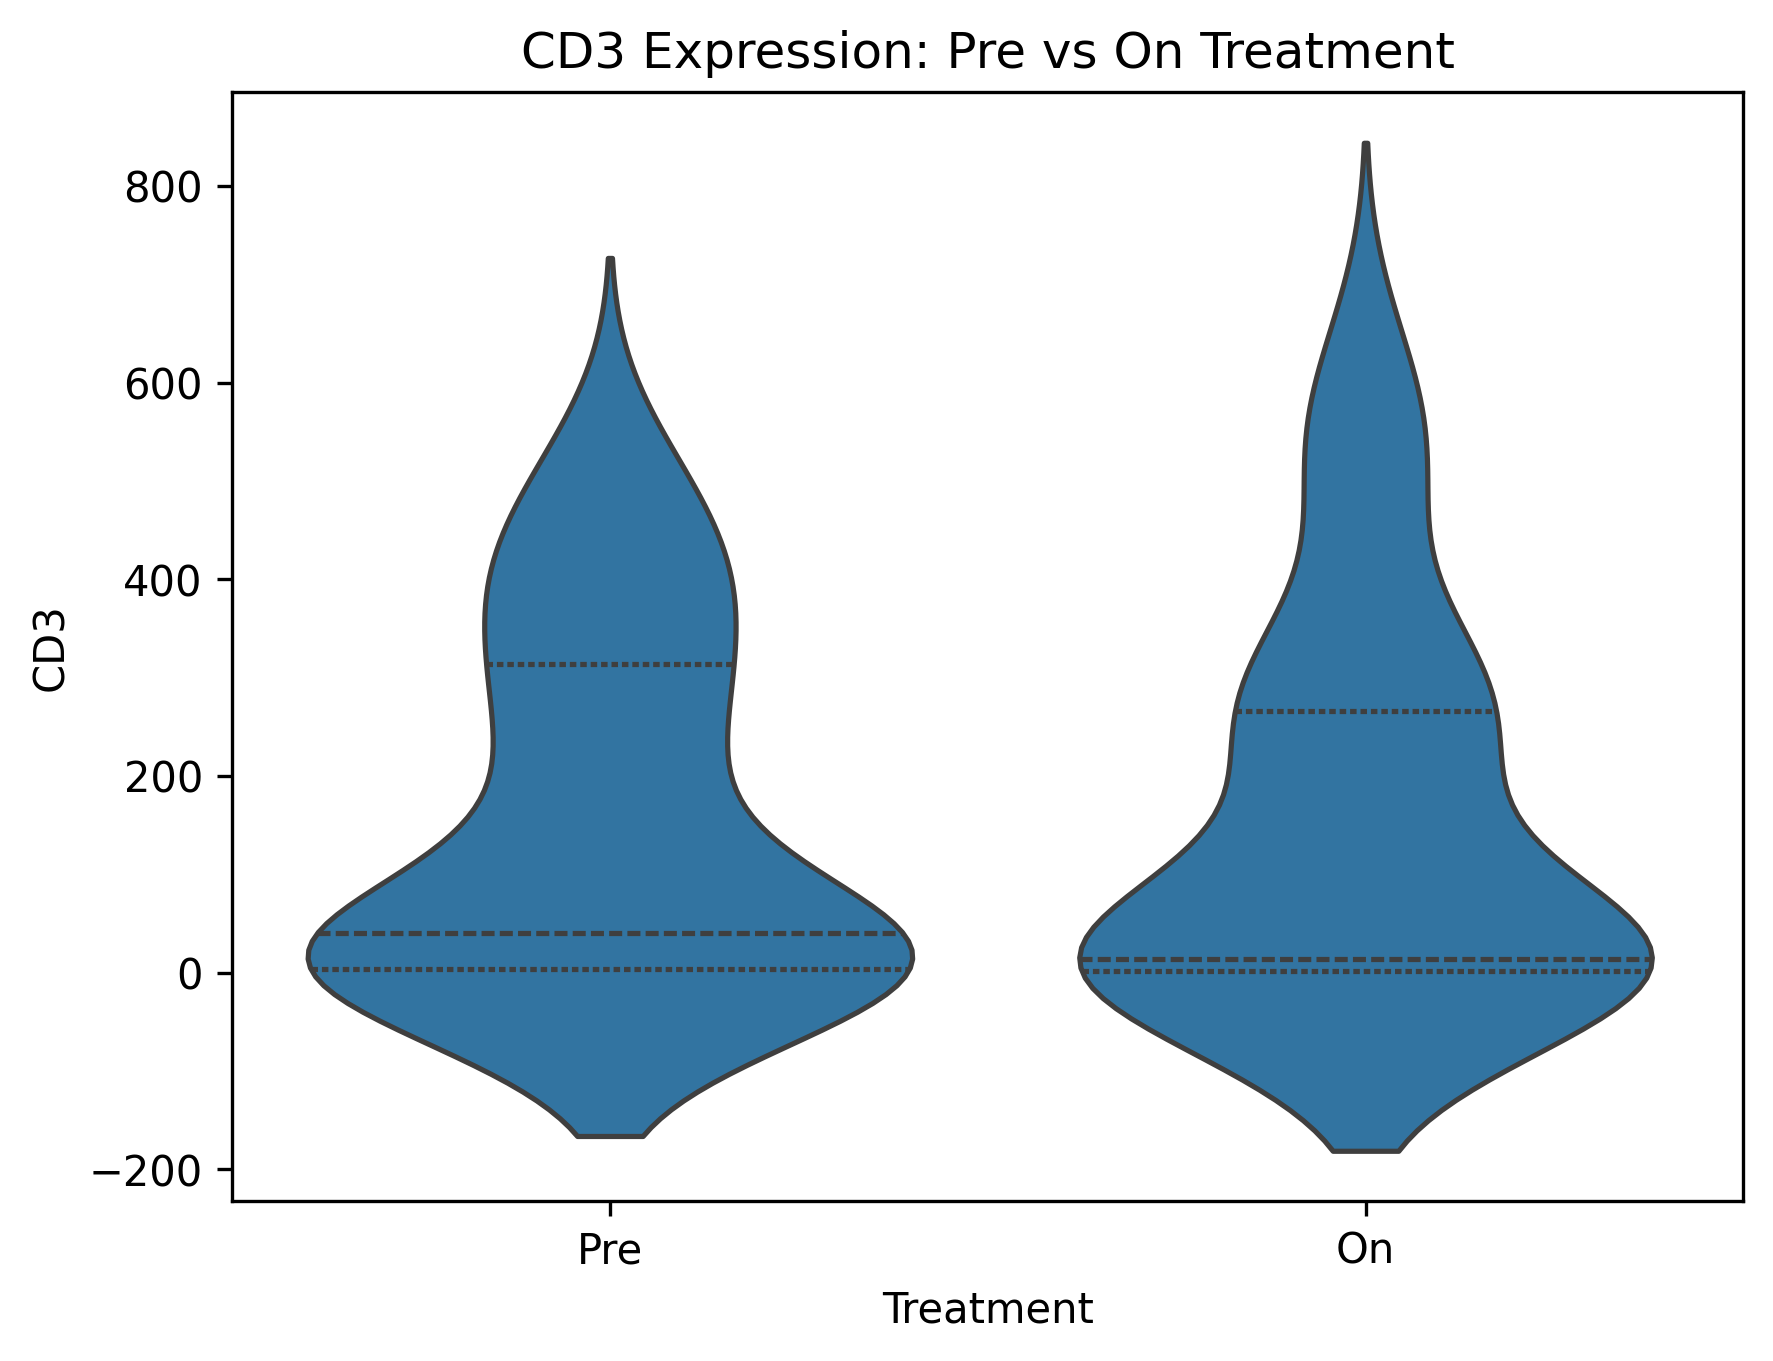

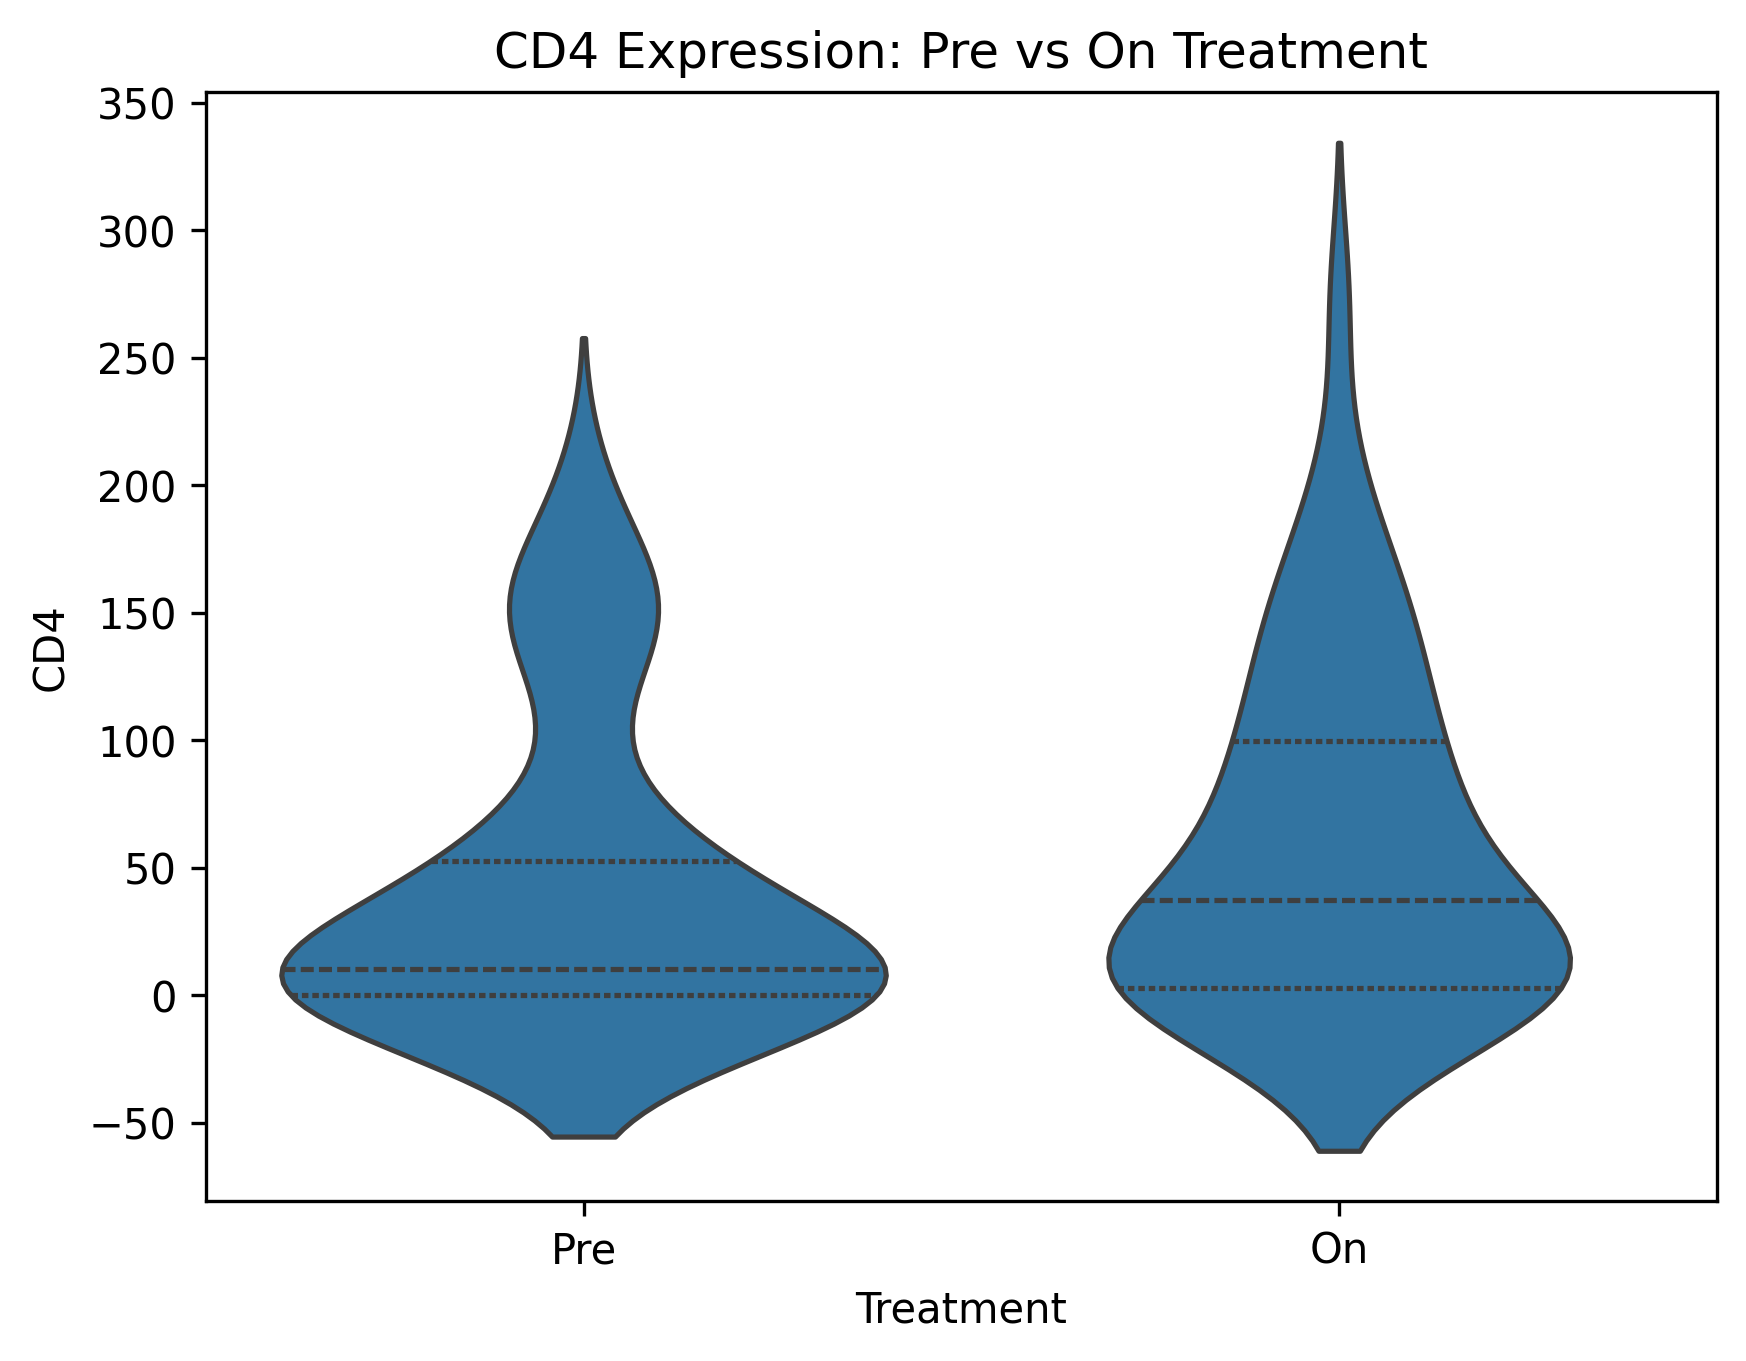

In [18]:
# Or compare multiple markers using violin plots or pair plots
markers = ['CD3', 'CD4']

for marker in markers:
    sns.violinplot(data=sampled_df, x='Treatment', y=marker, inner='quartile')
    plt.title(f'{marker} Expression: Pre vs On Treatment')
    plt.show()

In [19]:
#Mann-Whitney U Test no assumptions
from scipy.stats import mannwhitneyu

pre_cd4 = pre_sample['CD4']
on_cd4 = on_sample['CD4']

pre_cd3 = pre_sample['CD3']
on_cd3 = on_sample['CD3']

stat, p = mannwhitneyu(pre_cd3, on_cd3, alternative='two-sided')

print(f"Mann-Whitney U test for CD3: U={stat:.2f}, p-value={p:.4f}")

stat, p = mannwhitneyu(pre_cd4, on_cd4, alternative='two-sided')

print(f"Mann-Whitney U test for CD4: U={stat:.2f}, p-value={p:.4f}")




Mann-Whitney U test for CD3: U=1317.00, p-value=0.6466
Mann-Whitney U test for CD4: U=1028.50, p-value=0.1276


Mann-Whitney U test for TIM-3: U=1299.00, p-value=0.7381


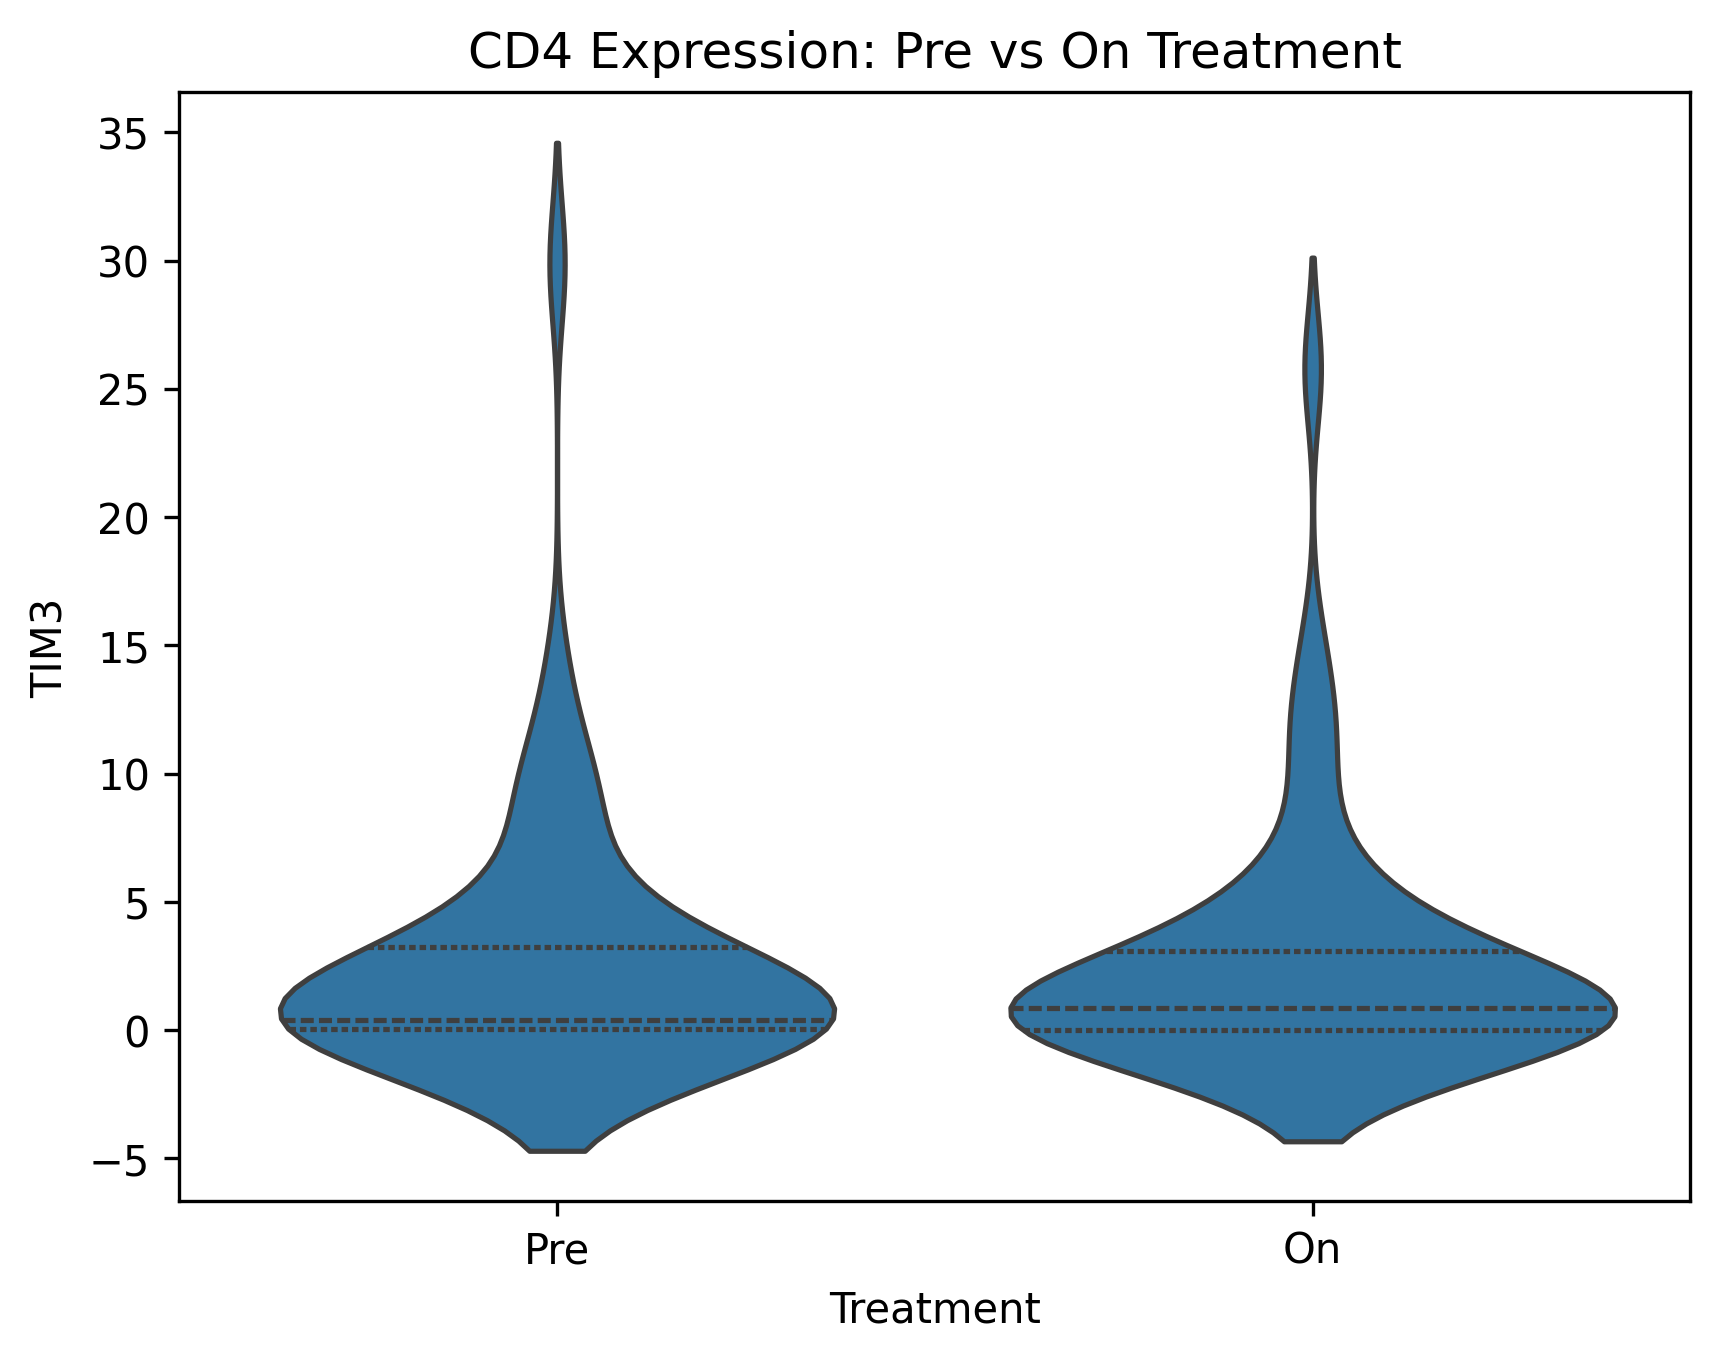

In [20]:
#Mann-Whitney U Test no assumptions
from scipy.stats import mannwhitneyu

pre_cdTIM3 = pre_sample['TIM3']
on_cdTIM3 = on_sample['TIM3']

stat, p = mannwhitneyu(pre_cdTIM3, on_cdTIM3, alternative='two-sided')

print(f"Mann-Whitney U test for TIM-3: U={stat:.2f}, p-value={p:.4f}")


sns.violinplot(data=sampled_df, x='Treatment', y='TIM3', inner='quartile')
plt.title(f'{marker} Expression: Pre vs On Treatment')
plt.show()


## Survivors vs Non-Survivors 

In [13]:
timepoint_filenames_survivors = segment_filenames_by_timepoint(
    merged_df=samples_survivors,
    barcodes_df=barcodes,
    fcs_barcodes=fcs_barcodes,
    filename_dict=filename_dict,
    fcs_folder=fcs_folder
)

survivors_pre_treat_files = timepoint_filenames_survivors['Pre-Treatment']
survivors_on_treat_files = timepoint_filenames_survivors['On Treatment']
survivors_follow_up_files = timepoint_filenames_survivors['Follow Up']
survivors_follow_up1_files = timepoint_filenames_survivors['Follow-Up1']
survivors_follow_up2_files = timepoint_filenames_survivors['Follow-Up2']
survivors_irae_files = timepoint_filenames_survivors['Irae']
survivors_irae_4w_files = timepoint_filenames_survivors['Irae 4 Week Follow-Up']
survivors_irae_6m_files = timepoint_filenames_survivors['Irae 6 Month Follow-Up']
survivors_irae_12m_files = timepoint_filenames_survivors['Irae 12 Month Follow-Up']
survivors_eosi_files = timepoint_filenames_survivors['Eosi']
survivors_end_of_study_files = timepoint_filenames_survivors['End Of Study']


In [14]:
timepoint_filenames_non_survivors = segment_filenames_by_timepoint(
    merged_df=samples_non_survivors,
    barcodes_df=barcodes,
    fcs_barcodes=fcs_barcodes,
    filename_dict=filename_dict,
    fcs_folder=fcs_folder
)

non_survivors_pre_treat_files = timepoint_filenames_non_survivors['Pre-Treatment']
non_survivors_on_treat_files = timepoint_filenames_non_survivors['On Treatment']
non_survivors_follow_up_files = timepoint_filenames_non_survivors['Follow Up']
non_survivors_follow_up1_files = timepoint_filenames_non_survivors['Follow-Up1']
non_survivors_follow_up2_files = timepoint_filenames_non_survivors['Follow-Up2']
non_survivors_irae_files = timepoint_filenames_non_survivors['Irae']
non_survivors_irae_4w_files = timepoint_filenames_non_survivors['Irae 4 Week Follow-Up']
non_survivors_irae_6m_files = timepoint_filenames_non_survivors['Irae 6 Month Follow-Up']
non_survivors_irae_12m_files = timepoint_filenames_non_survivors['Irae 12 Month Follow-Up']
non_survivors_eosi_files = timepoint_filenames_non_survivors['Eosi']
non_survivors_end_of_study_files = timepoint_filenames_non_survivors['End Of Study']


In [15]:
survivors_pre_treat_data = [fcsparser.parse(f, reformat_meta=True)[1] for f in survivors_pre_treat_files]
non_survivors_pre_treat_data = [fcsparser.parse(f, reformat_meta=True)[1] for f in non_survivors_pre_treat_files]

In [17]:
# Combine all pre-treatment data
pre_survivors_combined = pd.concat(survivors_pre_treat_data, ignore_index=True)
pre_non_survivors_combined = pd.concat(non_survivors_pre_treat_data, ignore_index=True)


In [18]:
pre_survivors_combined['Patient Survived'] = 'Yes'
pre_non_survivors_combined['Patient Survived'] = 'No'

combined_pre_data = pd.concat([pre_survivors_combined, pre_non_survivors_combined], ignore_index=True)

Mann-Whitney U test for TIM-3 pre-treat: U=98660585760691.50, p-value=0.0000


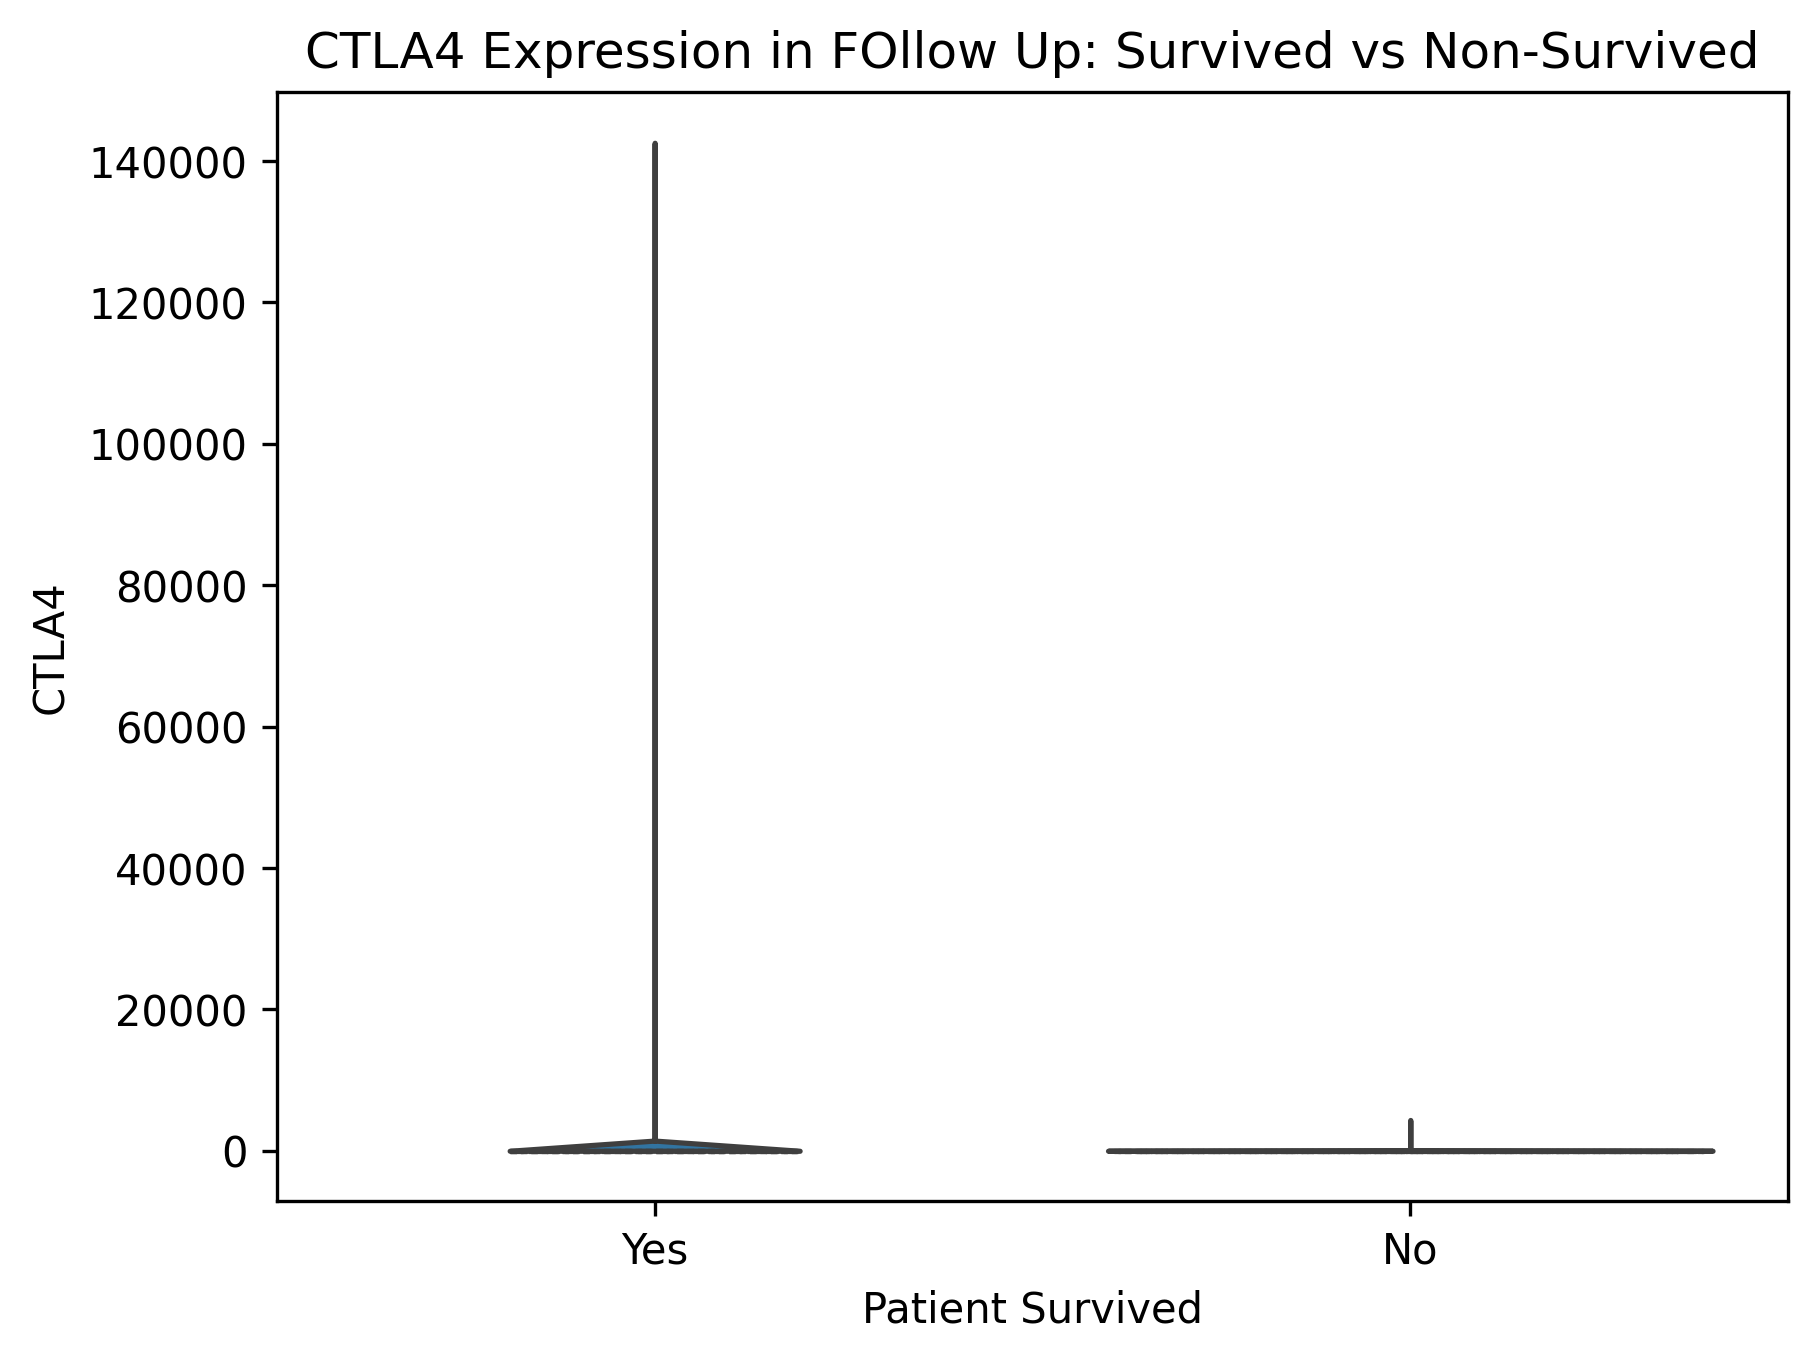

In [22]:
from scipy.stats import mannwhitneyu
import seaborn as sns
# Mann-Whitney U test between TIM-3 values for survivors vs non-survivors
tim3_survivors = pre_survivors_combined['TIM3']
tim3_non_survivors = pre_non_survivors_combined['TIM3']

stat, p = mannwhitneyu(tim3_survivors, tim3_non_survivors, alternative='two-sided')
print(f"Mann-Whitney U test for TIM-3 pre-treat: U={stat:.2f}, p-value={p:.4f}")


sns.violinplot(data=combined_pre_data, x='Patient Survived', y='CTLA4', inner='quartile')
plt.title('CTLA4 Expression in FOllow Up: Survived vs Non-Survived')
plt.show()

#### on treat

In [ ]:
survivors_on_treat_data = [fcsparser.parse(f, reformat_meta=True)[1] for f in survivors_on_treat_files]
non_survivors_on_treat_data = [fcsparser.parse(f, reformat_meta=True)[1] for f in non_survivors_on_treat_files]

: 

In [ ]:
# Combine all on-treatment data
on_treat_survivors_combined = pd.concat(survivors_on_treat_data, ignore_index=True)
on_treat_non_survivors_combined = pd.concat(non_survivors_on_treat_data, ignore_index=True)


In [ ]:
on_treat_survivors_combined['Patient Survived'] = 'Yes'
on_treat_non_survivors_combined['Patient Survived'] = 'No'

combined_on_data = pd.concat([on_treat_survivors_combined, on_treat_non_survivors_combined], ignore_index=True)

Mann-Whitney U test for TIM-3: U=98660585760691.50, p-value=0.0000


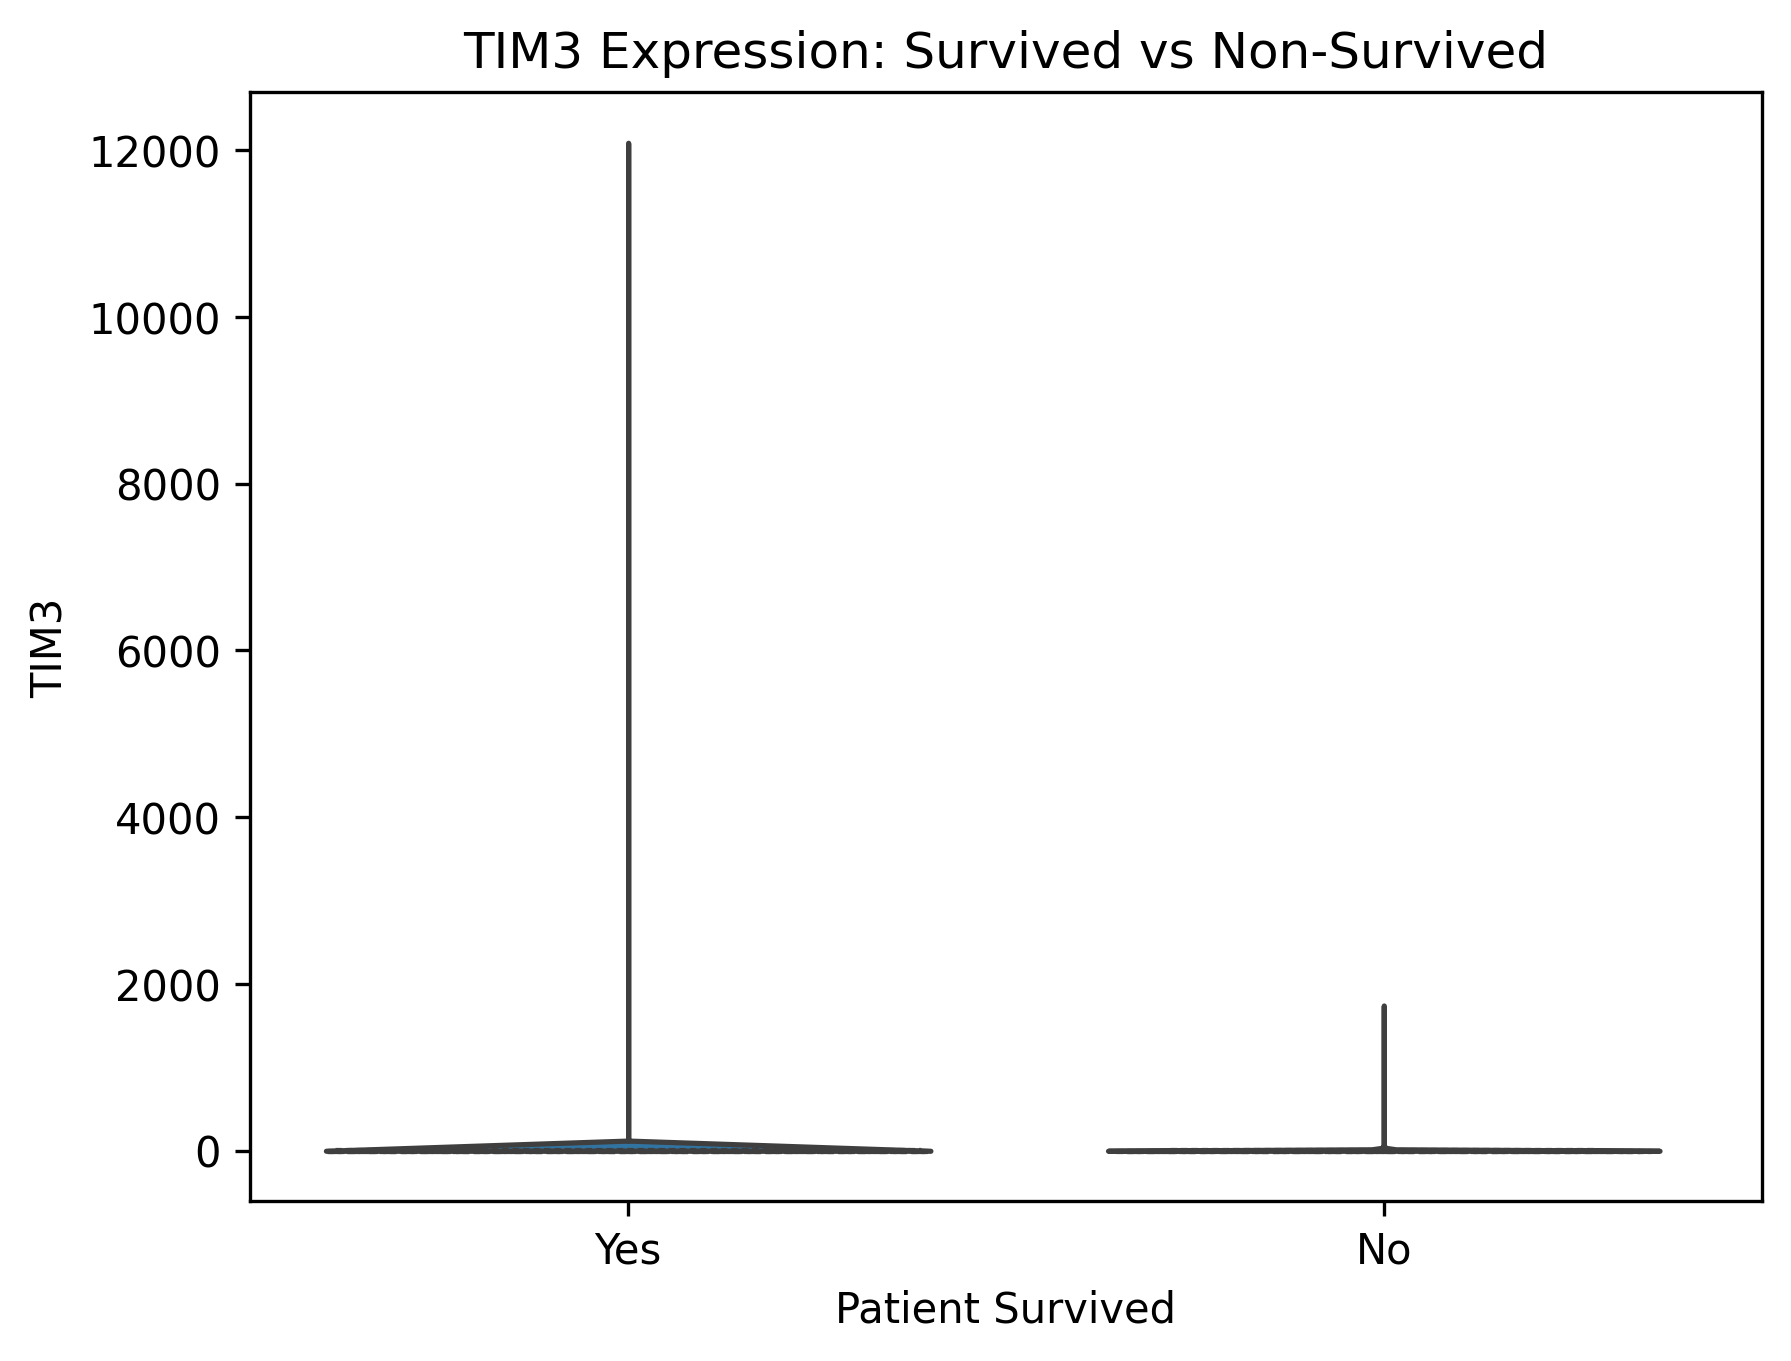

In [ ]:

# Mann-Whitney U test between CTLA4 values for survivors vs non-survivors
ctla4_survivors = on_treat_survivors_combined['CTLA4']
ctla4_non_survivors = on_treat_non_survivors_combined['CTLA']

stat, p = mannwhitneyu(ctla4_survivors, ctla4_non_survivors, alternative='two-sided')
print(f"Mann-Whitney U test for CTLA4 Follow=Up: U={stat:.2f}, p-value={p:.4f}")


sns.violinplot(data=combined_on_data, x='Patient Survived', y='CTLA4', inner='quartile')
plt.title('CTLA4 Expression in FOllow Up: Survived vs Non-Survived')
plt.show()

## Clustering

In [25]:
# markers
selected_markers = ['CD3', 'CD4', 'CD8A', 'CD19', 'CD56', 'CD57', 'PD1', 'CD39']


In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
reduced = pca.fit_transform(pre_non_survivors_combined[selected_markers])


In [ ]:
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=30)
pre_non_survivors_combined['cluster'] = clusterer.fit_predict(reduced)
